<a href="https://colab.research.google.com/github/PauloTchujo/PauloTchujo/blob/main/PrecosMensais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTANDO DADOS DE PRODUTOS AGROPECUARIOS
Objetivo:
1. Importar os preços divulgados no [ipea-Instituto de Pesquisa Economica Aplicada](https://www.ipea.gov.br/portal/);
2. Utilizar a [API-ipeadata](http://www.ipeadata.gov.br/Default.aspx);
3. Utilizar a biblioteca Python [ipeadatapy](http://www.luanborelli.net/ipeadatapy/docs/);
4. Construir grafico de preços e compara-los;

## Bibliotecas Utilizadas
Vamos instalar e importar bibliotecas para a realização do trabalho.

In [ ]:
!pip install ipeadatapy
!pip install fpdf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipeadatapy as ipea
from fpdf import FPDF

## Definindo Periodos de estudo

In [ ]:
ano1 = 2015
ano_fim = 2022

## Produtos para Estudo e Analise

### Taxa de cambio:
Preço do dolar cotado em R/US (reais por dolares americanos)

In [ ]:
ipea.list_series('Taxa de câmbio')

,CODE,NAME
3960,BM_ERC,Taxa de câmbio - R$ / US$ - comercial - compra...
3961,BM_ERCF,Taxa de câmbio - R$ / US$ - comercial - compra...
3962,BM_ERV,Taxa de câmbio - R$ / US$ - comercial - venda ...
3963,BM_ERVF,Taxa de câmbio - R$ / US$ - comercial - venda ...
3965,BM12_ERC12,Taxa de câmbio - R$ / US$ - comercial - compra...
...,...,...
7056,PAN_TCERXTINPC,Taxa de câmbio - efetiva real - INPC - exporta...
7063,PAN12_ERV12,Taxa de câmbio nominal
7077,PAN12_TCERXTINPC12,Taxa de câmbio - efetiva real - INPC - exporta...
7084,PAN4_ERV4,Taxa de câmbio nominal


In [ ]:
dolar = 'BM12_ERCF12'

### Soja comercial
Preço médio recebido pelo produtor no estado do Paraná.

In [ ]:
ipea.list_series('soja')

,CODE,NAME
196,LSPA_ASOJA,Área colhida - soja
217,LSPA_QSOJA,Produção - soja - quantidade
238,LSPA_VSOJA,Valor da Produção - soja
2046,HIST_XSOJAFQ,Exportações - farelo de soja - quantidade
2047,HIST_XSOJAFVUS,Exportações - farelo de soja
2048,HIST_XSOJAQ,Exportações - soja em grão - quantidade
2049,HIST_XSOJAV,Exportações - soja em grão
2050,HIST_XSOJAVUS,Exportações - soja em grão
4614,DEPAE12_ATOL12,Preço médio - atacado - óleo de soja - refinad...
4634,DERAL12_ATFSO12,Preço médio - atacado - soja (em farelo) - ton...


In [ ]:
soja = 'DERAL12_PRSO12'

### Milho comercial
Preço médio recebido pelo produtor no estado do Paraná.

In [ ]:
ipea.list_series('milho')

,CODE,NAME
194,LSPA_AMILH,Área colhida - milho
215,LSPA_QMILH,Produção - milho - quantidade
235,LSPA_VMILH,Valor da Produção - milho
4613,DEPAE12_ATMI12,Preço médio - atacado - milho (em grão) - 60 k...
4632,DERAL12_ATFRM12,Preço médio - atacado - milho (em farelo) - to...
4639,DERAL12_ATMC12,Preço médio - atacado - milho - 60 kg - PR
4671,DERAL12_PRMI12,Preço médio - recebido pelo agricultor - milho...
4694,FARINHA_MILHO,Preço médio - farinha de milho - alqueire
4970,MILHO,Preço médio - milho - alqueire
5980,IFS_MAIZE,Commodities - milho (Estados Unidos) - cotação...


In [ ]:
milho = 'DERAL12_PRMI12'

### Trigo comercial
Preço médio recebido pelo produtor no estado do Paraná.

In [ ]:
ipea.list_series('trigo')

,CODE,NAME
198,LSPA_ATRIG,Área colhida - trigo
219,LSPA_QTRIG,Produção - trigo - quantidade
240,LSPA_VTRIG,Valor da Produção - trigo
360,PIMPFN12_N80S260212,Produção industrial - farinha de trigo - quant...
2051,HIST_XTRIGQ,Exportações - trigo - quantidade
2052,HIST_XTRIGV,Exportações - trigo
2053,HIST_XTRIGVL,Exportações - trigo
2054,HIST_XTRIGVUS,Exportações - trigo
4635,DERAL12_ATFTRC12,Preço médio - atacado - farinha de trigo - 50 ...
4636,DERAL12_ATFTRE12,Preço médio - atacado - farinha de trigo - esp...


In [ ]:
trigo = 'DERAL12_PRTRG12'

### Leite comercial
Preço médio recebido pelo produtor no estado do Paraná.

In [ ]:
ipea.list_series('leite')

,CODE,NAME
131,HIST_LEITEPQ,Produção - leite pasteurizado - qde.
132,HIST_LEITEPV,Produção - leite pasteurizado
364,PIMPFN12_N80S280112,Produção industrial - leite beneficiado - quan...
466,PPM_QLEITE,Produção - leite - quantidade
468,PPM_VLEITE,Produção - leite
4588,CESBLEITE,Cesta básica - leite - preço mensal
4668,DERAL12_PRLECO12,Preço médio - recebido pelo agricultor - leite...
4669,DERAL12_PRLEE12,Preço médio - recebido pelo agricultor - leite...
4890,IGP12_IPA1521,IPA-OG - leite e derivados - índice (ago. 1994...
4962,LEITE,Preço médio - leite - frasco


In [ ]:
leite = 'DERAL12_PRLECO12'

### Mandioca comercial
Preço médio recebido pelo produtor no estado do Paraná.

In [ ]:
ipea.list_series('mandioca')

,CODE,NAME
133,HIST_MANDFAQ,Produção - farinha de mandioca - qde.
134,HIST_MANDFAV,Produção - farinha de mandioca
193,LSPA_AMAND,Área colhida - mandioca
214,LSPA_QMAND,Produção - mandioca - quantidade
234,LSPA_VMAND,Valor da Produção - mandioca
4628,DERAL12_ATFMAC12,Preço médio - atacado - farinha de mandioca cr...
4629,DERAL12_ATFMAT12,Preço médio - atacado - farinha de mandioca to...
4630,DERAL12_ATFMP12,Preço médio - atacado - farinha de mandioca pr...
4670,DERAL12_PRMAN12,Preço médio - recebido pelo agricultor - mandi...
4693,FARINHA_MANDIO,Preço médio - farinha de mandioca - alqueire


In [ ]:
mandioca = 'DERAL12_PRMAN12'

## Organizando
Vamos construir uma tabela de preços.

In [ ]:
produtos = [dolar, soja, milho, trigo, leite, mandioca]

In [ ]:
lista = pd.DataFrame()

for i in produtos:
  lista[i] = ipea.timeseries(i, yearGreaterThan=ano1)['VALUE (R$)']

In [ ]:
lista

,BM12_ERCF12,DERAL12_PRSO12,DERAL12_PRMI12,DERAL12_PRTRG12,DERAL12_PRLECO12,DERAL12_PRMAN12
DATE,,,,,,
2016-01-01,4.0422,70.8158,29.6009,38.2982,0.9906,217.0917
2016-02-01,3.9790,68.6810,32.4329,38.9642,1.0095,237.4658
2016-03-01,3.5583,63.7803,34.2552,39.6100,1.0262,339.6873
2016-04-01,3.4502,66.0058,37.1784,40.8052,1.0814,364.4782
2016-05-01,3.5945,73.0960,39.9797,41.4081,1.1491,328.9442
...,...,...,...,...,...,...
2021-08-01,5.1427,155.0527,93.6403,87.7518,2.2491,463.2251
2021-09-01,5.4388,156.8867,85.6552,87.5872,2.2880,509.3804
2021-10-01,5.6424,158.4415,82.8536,87.3446,2.2558,510.1361


### Renomeando as colunas da tabela

In [ ]:
lista.rename(columns=({'BM12_ERCF12':	'Dolar', 'DERAL12_PRSO12': 'Soja', 'DERAL12_PRMI12': 'Milho', 
                       'DERAL12_PRTRG12': 'Trigo',	'DERAL12_PRLECO12': 'Leite', 'DERAL12_PRMAN12': 'Mandioca'}), inplace=True)

### Selecionando os ultimos 60 meses

In [ ]:
ultimos_60meses = lista.iloc[-60:]

## Analise Grafica

### Gráfico dos preços

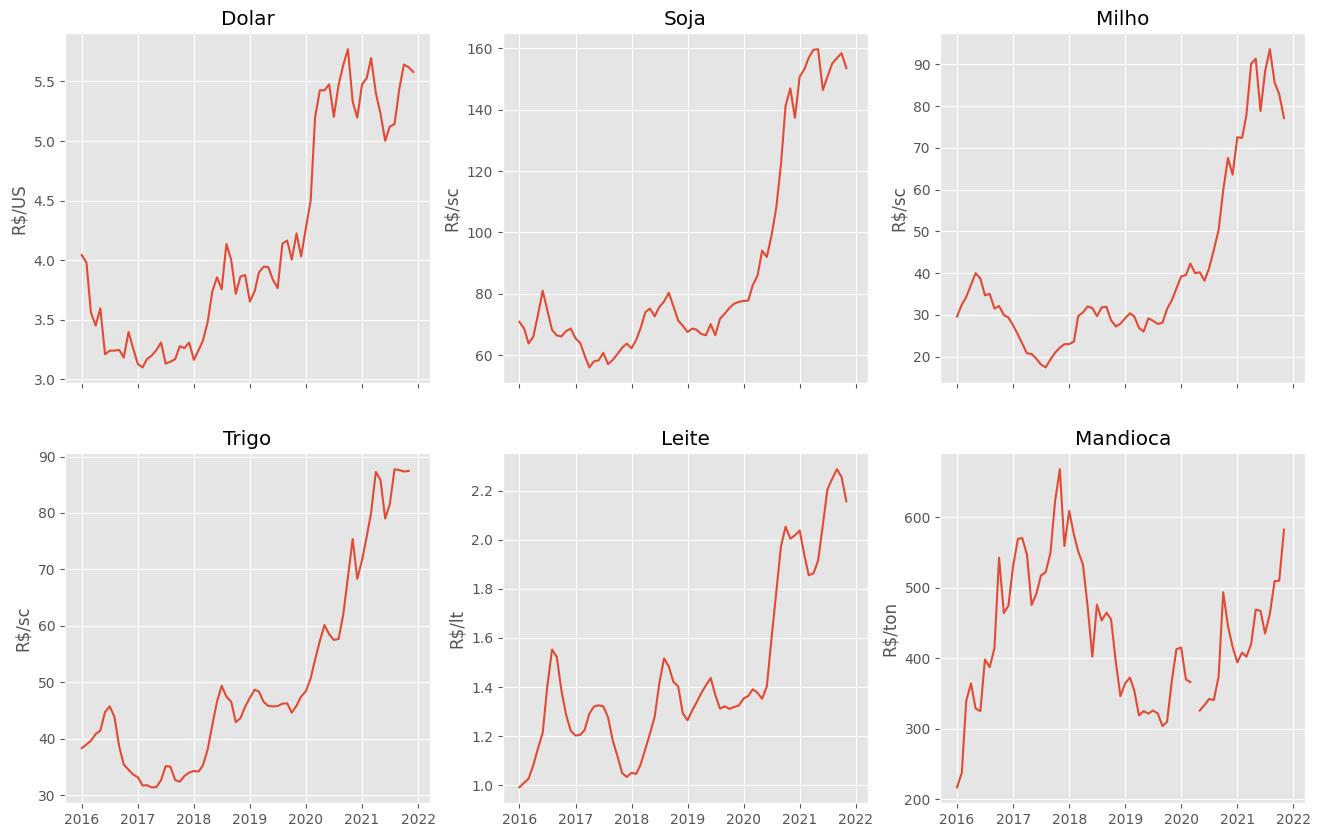

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10), sharex=True, sharey=False)

# Dolar
axs[0, 0].plot(lista['Dolar'])
axs[0, 0].set_title('Dolar')
axs[0, 0].set_ylabel('R$/US')

# Soja
axs[0, 1].plot(lista['Soja'])
axs[0, 1].set_title('Soja')
axs[0, 1].set_ylabel('R$/sc')

# Milho
axs[0, 2].plot(lista['Milho'])
axs[0, 2].set_title('Milho')
axs[0, 2].set_ylabel('R$/sc')

# Trigo
axs[1, 0].plot(lista['Trigo'])
axs[1, 0].set_title('Trigo')
axs[1, 0].set_ylabel('R$/sc')

# Leite
axs[1, 1].plot(lista['Leite'])
axs[1, 1].set_title('Leite')
axs[1, 1].set_ylabel('R$/lt')

# Mandioca
axs[1, 2].plot(lista['Mandioca'])
axs[1, 2].set_title('Mandioca')
axs[1, 2].set_ylabel('R$/ton')

plt.show()
#plt.savefig('produtos.png',bbox_inches='tight',pad_inches = 0.1,dpi=300)

### Tabela descritiva dos preços

In [ ]:
ultimos_60meses.describe()

,Dolar,Soja,Milho,Trigo,Leite,Mandioca
count,60.000000,59.000000,59.000000,59.000000,59.000000,58.000000
mean,4.294815,91.648849,41.360602,52.347122,1.499331,443.937734
std,0.921689,36.028978,22.590225,17.835260,0.359630,92.860430
min,3.098700,55.988300,17.413500,31.345400,1.033200,304.086800
25%,3.441175,66.472600,27.045650,36.668750,1.285350,366.859825
50%,4.003400,75.380400,31.413200,46.588600,1.363300,440.521350
75%,5.256475,115.003600,47.941350,61.087900,1.819650,515.720225
max,5.771200,159.741600,93.640300,87.751800,2.288000,668.152100


### Grafico de correlação
Há correlação entre os produtos?
> Podemos concluir que os preços se movimentaram em direções iguai.

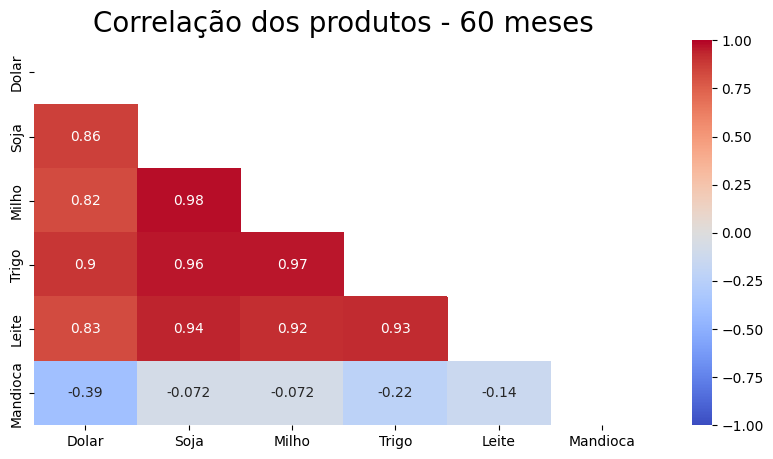

In [ ]:
correlacao = ultimos_60meses.corr()
mask = np.triu(correlacao)

plt.style.use('default')
plt.figure(figsize=(10, 5))
plt.title('Correlação dos produtos - 60 meses', fontsize = 20)
sns.heatmap(correlacao, vmin=-1, vmax=1, annot=True, cmap='coolwarm', mask=mask)
 plt.show()
#plt.savefig('correlacoes.png',bbox_inches='tight',pad_inches = 0.1,dpi=300)

### Gráficos de disperção e frequencia


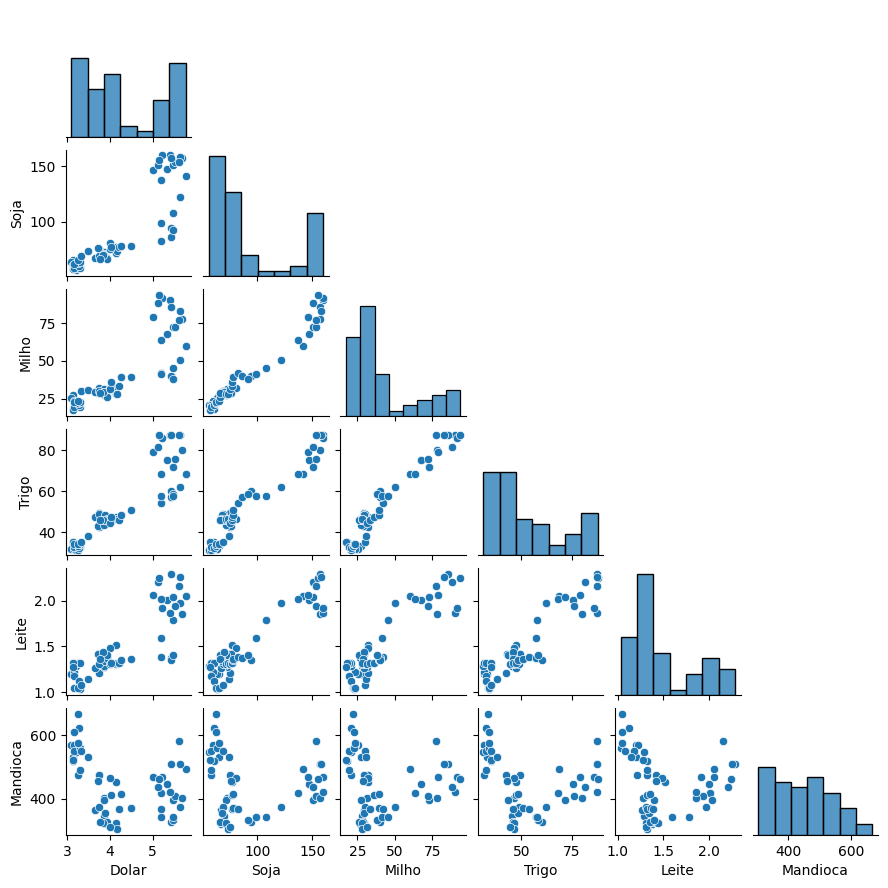

In [ ]:
plt.style.use('default')
sns.pairplot(ultimos_60meses, height=1.5, corner=True)
#plt.show()
plt.savefig('correlacoes_dispersoes.png',bbox_inches='tight',pad_inches = 0.1,dpi=300)

## Analise comparativa

In [ ]:
retornos = ultimos_60meses.pct_change()

In [ ]:
acumulado = (1 + retornos).cumprod()
acumulado.head()

,Dolar,Soja,Milho,Trigo,Leite,Mandioca
DATE,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-01,0.991140,0.976178,0.920829,0.956063,1.002413,1.071050
2017-03-01,1.013242,0.915461,0.841698,0.957600,1.018639,1.073018
2017-04-01,1.022838,0.855447,0.756489,0.946085,1.074555,1.028425
2017-05-01,1.037327,0.885397,0.751553,0.947256,1.098436,0.894305


In [ ]:
acumulado[0:1] = 1
acumulado = acumulado-1

### Grafico de valorização dos produtos

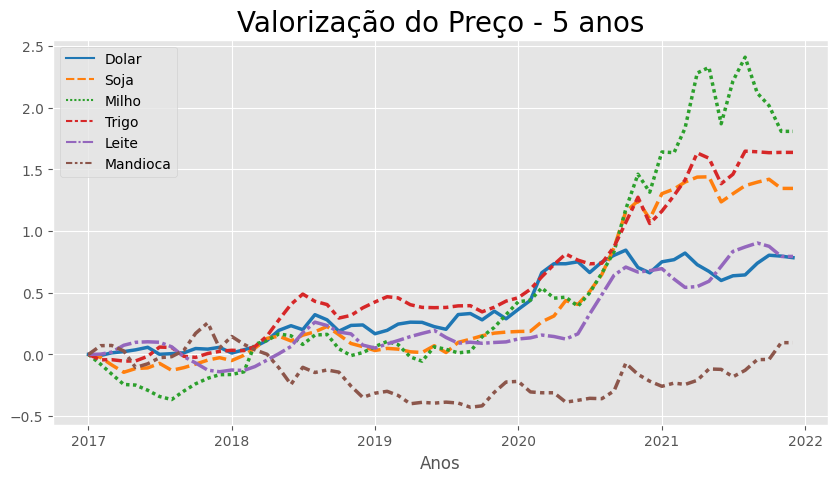

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Valorização do Preço - 5 anos', fontsize = 20)
plt.xlabel('Anos')
sns.lineplot(data=acumulado, palette="tab10", linewidth=2.5)
plt.show()
#plt.savefig('valorizacao_produtos.png',bbox_inches='tight',pad_inches = 0.1,dpi=300)

## Conclusões
* Os produtos apresentaram nos ultimos 60 meses, correlações positivas e próxima a 1, ou seja se movimentaram juntas. Exceto a mandioca.
* A mandioca foi o produto que apresentou o menor retorno acumulado nos ultimos 60 meses.

---
Meu objetivo é públicar este estudo no linkedin, mas ainda existem melhoras a serem realizadas.
1. Preciso criar um PDF com estes dados aqui e apresenta-os diretamente.